<a href="https://colab.research.google.com/github/khanabdulmajid/CNN/blob/master/Mnist%20Handwriting%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [5]:
mnist=tf.keras.datasets.mnist

In [8]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

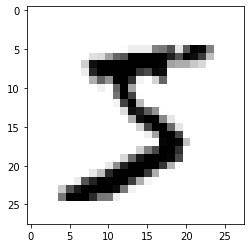

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)



In [13]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [22]:
x_train.shape

(60000, 28, 28)

In [27]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=40)

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9227
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1076 - accuracy: 0.9665
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0727 - accuracy: 0.9774
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0536 - accuracy: 0.9827
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0412 - accuracy: 0.9864
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0326 - accuracy: 0.9891
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0236 - accuracy: 0.9919
Epoch 8/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0218 - accuracy: 0.9928
Epoch 9/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0167 - accuracy: 0.9945
Epoch 10/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

In [28]:
val_loss,val_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 930us/step - loss: 0.2266 - accuracy: 0.9747


In [29]:
print(val_loss,val_acc)

0.226578950881958 0.9746999740600586


In [30]:
model.save('epic_num_prediction_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_prediction_model/assets


In [32]:
new_model=tf.keras.models.load_model('epic_num_prediction_model')

In [33]:
import numpy as np

prediction=new_model.predict(x_test)

In [35]:
prediction

array([[1.31580163e-35, 1.08827937e-24, 4.52449101e-25, ...,
        1.00000000e+00, 3.10191368e-30, 9.55230938e-22],
       [0.00000000e+00, 1.32451375e-20, 1.00000000e+00, ...,
        0.00000000e+00, 1.59308994e-30, 0.00000000e+00],
       [1.67634091e-22, 1.00000000e+00, 9.54559412e-17, ...,
        5.51920019e-15, 2.44378390e-14, 8.02438148e-24],
       ...,
       [3.58563025e-33, 5.10883484e-20, 3.87991013e-23, ...,
        1.52049005e-16, 4.51717542e-19, 1.84412043e-17],
       [2.92156235e-27, 1.87363956e-25, 3.80652192e-30, ...,
        1.73657239e-17, 1.21301480e-09, 1.21912020e-27],
       [2.54078135e-24, 1.50663345e-23, 1.12323785e-29, ...,
        0.00000000e+00, 4.69486245e-34, 1.25894352e-33]], dtype=float32)

3


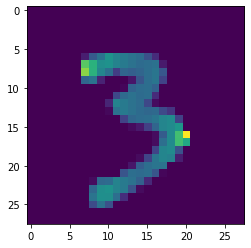

1


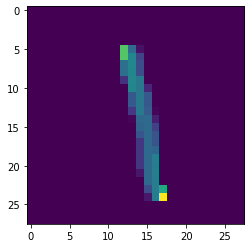

3


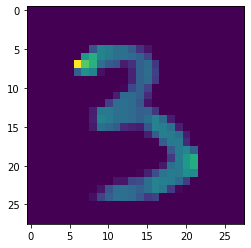

4


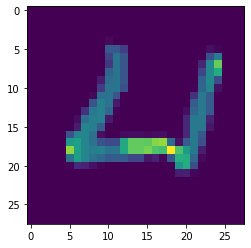

7


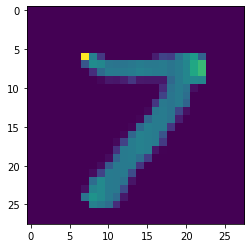

2


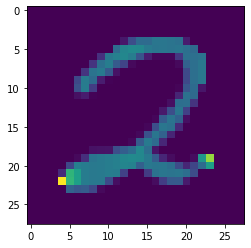

7


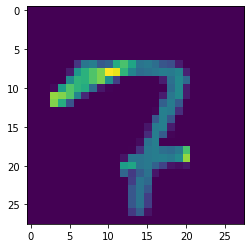

1


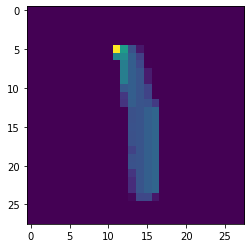

2


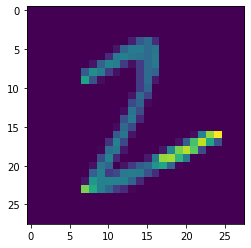

In [41]:
for n in range(30,39):
  print(np.argmax(prediction[n]))
  plt.imshow(x_test[n])
  plt.show()